In [ ]:
!pip install medmnist

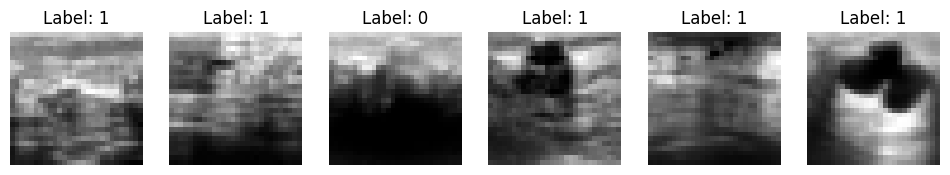

In [ ]:
import medmnist
from medmnist import INFO, BreastMNIST
from torchvision import transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import torch

# Asegúrate de usar la versión correcta del conjunto de datos
data_flag = 'breastmnist'
download = True

# Información del dataset
info = INFO[data_flag]
DataClass = getattr(medmnist, info['python_class'])

# Transformaciones: convertir a tensor
transform = transforms.Compose([
    transforms.ToTensor()
])

# Cargar dataset (train, val y test)
train_dataset = DataClass(split='train', transform=transform, download=download)
val_dataset = DataClass(split='val', transform=transform, download=download)
test_dataset = DataClass(split='test', transform=transform, download=download)

# Cargar en DataLoader
train_loader = DataLoader(dataset=train_dataset, batch_size=32, shuffle=True)

# Mostrar 6 imágenes con sus etiquetas
images, labels = next(iter(train_loader))
fig, axs = plt.subplots(1, 6, figsize=(12, 2))
for i in range(6):
    axs[i].imshow(images[i].squeeze(), cmap='gray')
    axs[i].set_title(f'Label: {labels[i].item()}')
    axs[i].axis('off')
plt.show()

In [ ]:
# Cantidad de datos por split
print(f'Train: {len(train_dataset)} imágenes')
print(f'Validación: {len(val_dataset)} imágenes')
print(f'Test: {len(test_dataset)} imágenes')

# Información general
print("Forma de las imágenes:", images[0].shape)  # Ej: [1, 64, 64]
print("Tipo de datos:", images[0].dtype)
print("Ejemplo de etiqueta:", labels[0].item())


Train: 546 imágenes
Validación: 78 imágenes
Test: 156 imágenes
Forma de las imágenes: torch.Size([1, 28, 28])
Tipo de datos: torch.float32
Ejemplo de etiqueta: 1


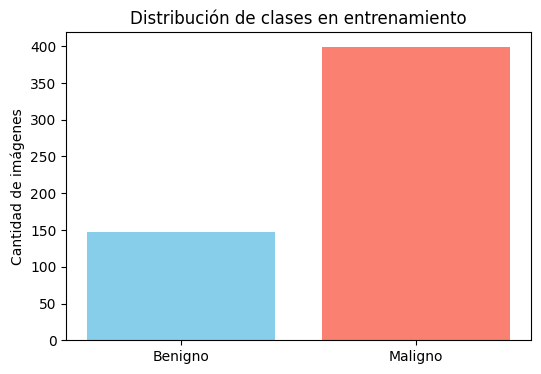

In [ ]:
import numpy as np

# Extraer todas las etiquetas
all_labels = torch.cat([label for _, label in DataLoader(train_dataset, batch_size=32)])

# Contar ocurrencias
unique, counts = torch.unique(all_labels, return_counts=True)
class_names = ['Benigno', 'Maligno']

# Graficar distribución
plt.figure(figsize=(6,4))
plt.bar(class_names, counts.numpy(), color=['skyblue', 'salmon'])
plt.title("Distribución de clases en entrenamiento")
plt.ylabel("Cantidad de imágenes")
plt.show()

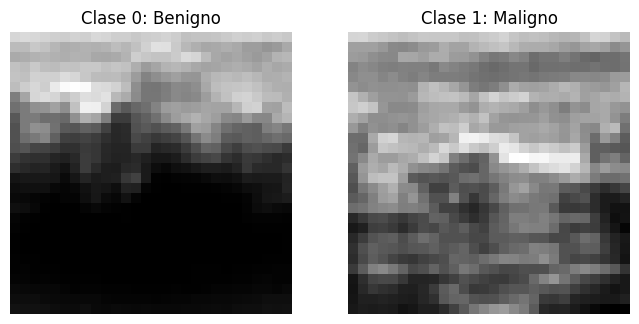

In [ ]:
# Mostrar ejemplos de cada clase
fig, axs = plt.subplots(1, 2, figsize=(8,4))
for label_val in [0, 1]:
    idx = (labels == label_val).nonzero(as_tuple=True)[0][0]
    axs[label_val].imshow(images[idx].squeeze(), cmap='gray')
    axs[label_val].set_title(f'Clase {label_val}: {class_names[label_val]}')
    axs[label_val].axis('off')
plt.show()